In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
np.random.seed(42)

In [15]:
employee_id=[f"Emp_{i:03d}"for i in range(1,31)]
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")


In [17]:
employee_id

['Emp_001',
 'Emp_002',
 'Emp_003',
 'Emp_004',
 'Emp_005',
 'Emp_006',
 'Emp_007',
 'Emp_008',
 'Emp_009',
 'Emp_010',
 'Emp_011',
 'Emp_012',
 'Emp_013',
 'Emp_014',
 'Emp_015',
 'Emp_016',
 'Emp_017',
 'Emp_018',
 'Emp_019',
 'Emp_020',
 'Emp_021',
 'Emp_022',
 'Emp_023',
 'Emp_024',
 'Emp_025',
 'Emp_026',
 'Emp_027',
 'Emp_028',
 'Emp_029',
 'Emp_030']

In [21]:

data={
    "Date":np.tile(dates,len(employee_id)),
    "Employee_id":np.repeat(employee_id,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_id))
}


In [25]:
df=pd.DataFrame(data)

In [63]:
row=df.iloc[0]
row

Date             2025-07-03 00:00:00
Employee_id                  Emp_001
Working_Hours               7.978287
Name: 2, dtype: object

In [31]:
df.to_csv("employee_working_hours.csv",index=False)

In [33]:
#Read from csv
df_csv=pd.read_csv("employee_working_hours.csv")

In [39]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_id"].nunique())

         Date Employee_id  Working_Hours
0  2025-07-01     Emp_001       7.864861
1  2025-07-02     Emp_001       6.284491
2  2025-07-03     Emp_001       7.978287
3  2025-07-04     Emp_001       4.981904
4  2025-07-05     Emp_001       9.775647
       Working_Hours
count     900.000000
mean        7.004995
std         1.752230
min         4.019366
25%         5.503066
50%         6.975393
75%         8.489365
max         9.993653
30


In [43]:
#Total hours per emplloyee
total_hours=df_csv.groupby("Employee_id")["Working_Hours"].sum().sort_values(ascending=False)

In [45]:
daily_avg=df_csv.groupby("Employee_id")["Working_Hours"].mean()

In [53]:
threshold_low=5
threshold_high=9
df_csv["Low_Hours_Flag"]=df_csv["Working_Hours"] < threshold_low
df_csv["High_Hours_Flag"]=df_csv["Working_Hours"] > threshold_high



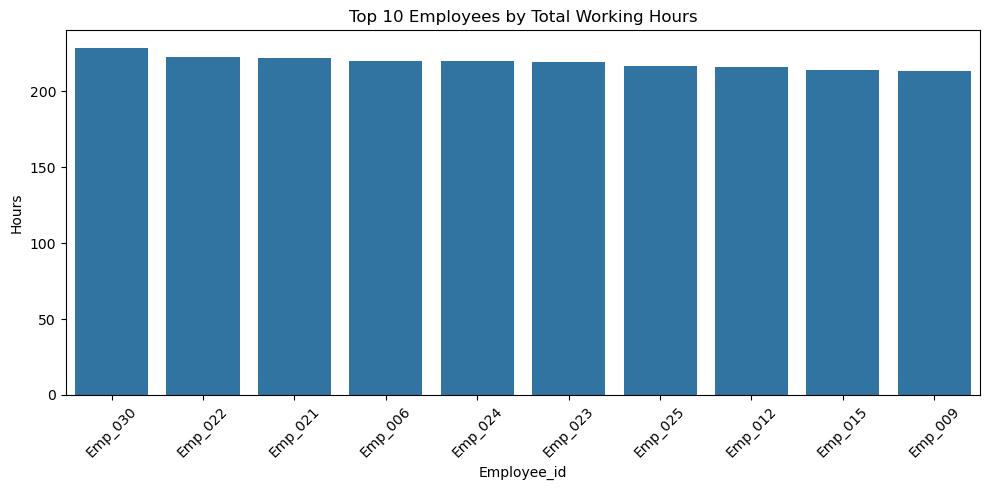

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
#Bar chart of top 10 employees with highest total hours
top10= total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

In [ ]:
row=df_csv.loc[df["Emp_001"]==]# variables=df.loc[(df["name"]=="john")]